This notebook imports the GPR model published in the article titled "A Machine Learning Approach to Predicting the Spall Strength of Metals and Alloys" and offers predictions for the spall strength of new candidates.

<!-- For more detailed information, please refer to [hyperlink](paper). -->

<ipython-input-4-2a6780e25f0f>:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(handles=handles[0:], labels=labels[0:], fontsize=13)


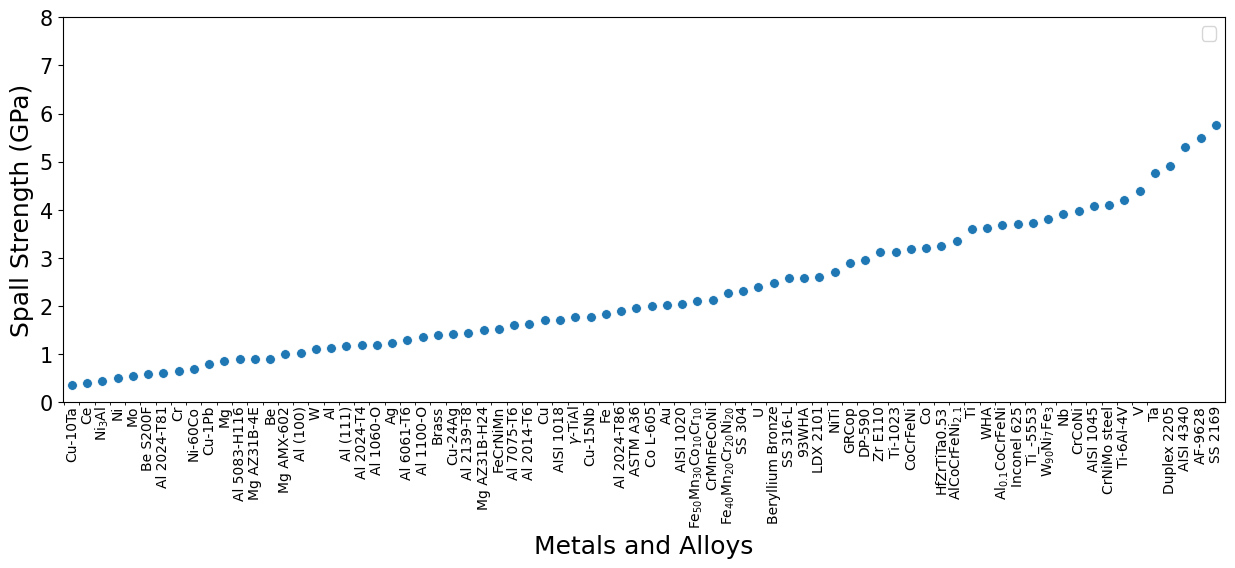

Predicted Spall Strength using Gaussian Process Regression (GPR) model is: 4.14 ± 2.37 GPa


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
#@title Predict the Spall Strength for a Metal or Alloy
#@markdown ***Please first input your parameters, and then press on the left button to run.***

# Import packages
import os
import pickle
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib.ticker import AutoMinorLocator
from scipy import stats

# Import models
if os.path.exists("/usr/local/spall_strength_prediction"):
  pass
else:
  %cd /usr/local
  !git clone -q https://github.com/Ramprasad-Group/spall_strength_prediction.git


# Plot the dataset
df = pd.read_csv('/usr/local/spall_strength_prediction/dataset/metals&alloys.csv')
df1 = df.sort_values('spall_median')

fig = plt.figure(figsize=(15, 5))
ax = plt.gca()

plt.errorbar(df1['label'], df1['spall_median'], fmt='none', ecolor = 'gray', elinewidth=1, zorder=0)



sns.scatterplot(data=df1, x=df1['label'], y=df1['spall_median'],
                s=50, zorder=1, legend="full")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], fontsize=13)


plt.xlabel('Metals and Alloys', fontsize=18)
ax.set_xticks(np.arange(-0.5, 71, 1), minor=True)
ax.tick_params(axis="x",direction="in", pad=2)
plt.xticks(rotation=90)


plt.ylim(0,8)
plt.ylabel('Spall Strength (GPa)', fontsize=18)

plt.tick_params(bottom = False)
plt.tick_params(axis='y', labelsize=15)


plt.margins(x=0.008)
plt.show()




# Load the GPR model
with open('/usr/local/spall_strength_prediction/model/gpr.pkl', 'rb') as file:
    GPR = pickle.load(file)

# @markdown 1. Ultimate Tensile Strength (UTS) (MPa):
UTS = 397 # @param {type:"number"}
# @markdown 2. Tensile Yield Strength (MPa):
yield_strength = 345 # @param {type:"number"}
# @markdown 3. Bulk Modulus (GPa):
bulk_modulus = 150 # @param {type:"number"}
# @markdown 4. Young's Modulus (GPa):
youngs_modulus = 126 # @param {type:"number"}
# @markdown 5. Density (g/cc):
density = 7.0 # @param {type:"number"}
# @markdown 6. Vickers Hardness (HV):
hardness = 518 # @param {type:"number"}
# @markdown 7. Fracture Toughness (MPa√m):
fracture_toughness = 25 # @param {type:"number"}

# Create a pandas DataFrame
column_names = ['UTS', 'yield_strength', 'bulk_modulus', 'youngs_modulus', 'density',
       'hardness', 'fracture_toughness']
input_data_list = [UTS,yield_strength, bulk_modulus, youngs_modulus, density,
                   hardness, fracture_toughness]
input_data = pd.DataFrame(columns=column_names)
input_data.loc[len(input_data)] = input_data_list


train = pd.read_csv('/usr/local/spall_strength_prediction/dataset/metals&alloys.csv')

### creating train and test sets ###
trainX = train[column_names]
trainy = train['spall_median']

### Descriptor scaling ###
scalerM = MinMaxScaler()
scalerM.fit(trainX)
trainX_M = scalerM.transform(trainX)
testX_M = scalerM.transform(input_data)

#GPR
test_pred_GPR, test_pred_GPR_std = GPR.predict(testX_M, return_std=True)


print('Predicted Spall Strength using Gaussian Process Regression (GPR) model is: %.2f ± %.2f GPa' %(test_pred_GPR[0], test_pred_GPR_std[0]))



# References and further reading

- Keara Frawley, Naresh Thadhani, Rampi Ramprasad, Harikrishna Sahu, *A Machine Learning Approach to Predicting the Spall Strength of Metals and Alloys*, in submission Nov 2024

<!-- citation info, DOI: [hyperlink](paper) -->